In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

In [2]:
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
y = cancer.target
scaler = StandardScaler()

X = scaler.fit_transform(X)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


In [4]:
nn = MLPClassifier(activation = 'relu', solver = 'sgd', hidden_layer_sizes = (10), max_iter = 1000, random_state = 1)
nn.fit(x_train, y_train)
y_pred = nn.predict(x_test)
print(y_test)
print(y_pred)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names = target_names))

[0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0
 1 1 1]
[0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0
 1 1 1]
              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95        42
     class 1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



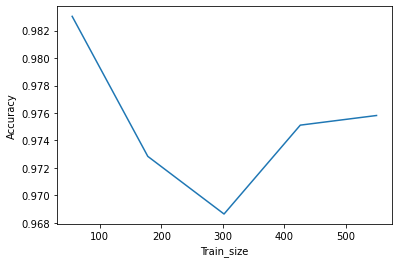

In [5]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(nn, X, y, cv = 30, return_times=True)

plt.xlabel('Train_size')
plt.ylabel('Accuracy')
plt.plot(train_sizes, np.mean(train_scores, axis=1))